# Python Unit 3 Quiz

## Exercise
Speed comparison between vectorized and non-vectorized code. Begin by creating an array of 10 million random numbers using the numpy random.randn module. Compute the sum of the squares first in a for loop, then using Numpy's `dot` module. Time how long it takes to compute each and report the results and report the output. How many times faster is the vectorized code than the for loop approach?

*Note: all code should be well commented, properly formatted, and your answers should be output using the `print()` function as follows (where the # represents your answers, to a reasonable precision):

`Time [sec] (non-vectorized): ######`

`Time [sec] (vectorized):     ######`

`The vectorized code is ##### times faster than the vectorized code`

**Solution**

In [3]:
import numpy as np
import time

# Generate the random samples
x = np.random.randn(10000000)

# Compute the sum of squares the non-vectorized way (using a for loop)
t0 = time.time()
sum_of_squares = 0
for value in x:
    sum_of_squares += value**2
t1 = time.time()
time_nonvectorized = t1 - t0  

# Compute the sum of squares the vectorized way (using numpy)
t0 = time.time()
sum_of_squares = np.dot(x,x)
t1 = time.time()
time_vectorized = t1 - t0

print('Time [sec] (non-vectorized): {:0.4f}'.format(time_nonvectorized))
print('Time [sec] (vectorized):     {:0.4f}'.format(time_vectorized))
print('The vectorized code is {:0.1f} times faster than the vectorized code'.format(time_nonvectorized/time_vectorized))

Time [sec] (non-vectorized): 4.6890
Time [sec] (vectorized):     0.0042
The vectorized code is 1125.3 times faster than the vectorized code


## Exercise
One popular Agile development framework is Scrum (a paradigm recommended for data science projects). It emphasizes the continual evolution of code for projects, becoming progressively better, but starting with a quickly developed minimum viable product. This often means that code written early on is not optimized, and that's a good thing - it's best to get it to work first before optimizing. Imagine that you wrote the following code during a sprint towards getting an end-to-end system working. Vectorize the following code and show the difference in speed between the current implementation and a vectorized version.

The function below computes the function $f(x,y) = x^2 - 2 y^2$ and determines whether this quantity is above or below a given threshold, `thresh=0`. This is done for $x,y \in \{-4,4\}$, over a 2,000-by-2,000 grid covering that domain.

(a) Vectorize this code and demonstrate (as in the last exercise) the speed increase through vectorization and (b) plot the resulting data - both the function $f(x,y)$ and the thresholded output - using [`imshow`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html?highlight=matplotlib%20pyplot%20imshow#matplotlib.pyplot.imshow) from `matplotlib`.

*Hint: look at the `numpy` [`meshgrid`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.meshgrid.html) documentation*

**Solution**

Time [sec] (non-vectorized): 8.5310
Time [sec] (vectorized):     0.0954
The vectorized code is 89.4 times faster than the vectorized code


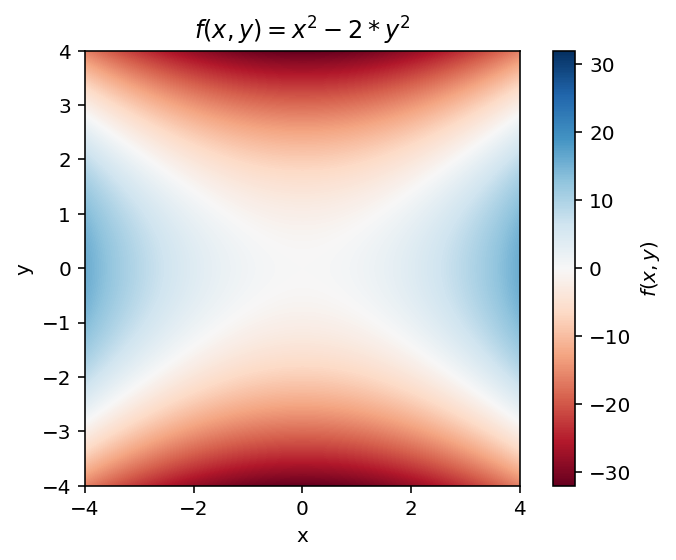

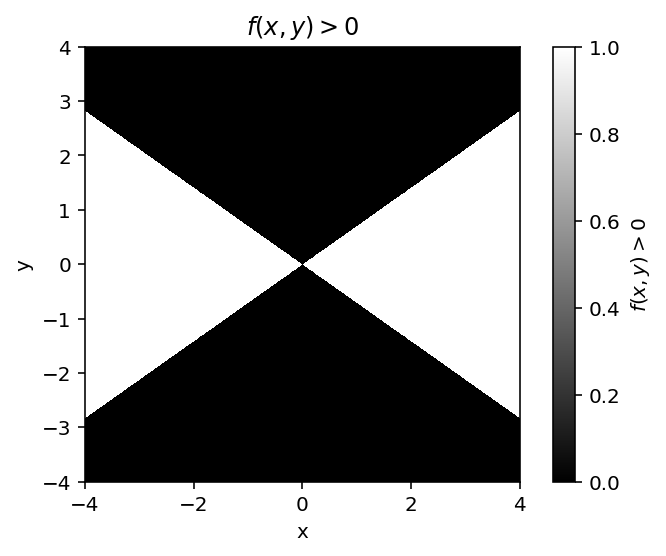

In [29]:
# This increases the resolution of the plots to make them cripser within the notebook
%config InlineBackend.figure_format = 'retina'

import numpy as np
import time
import matplotlib.pyplot as plt

nvalues = 2000
xvalues = np.linspace(-4,4,nvalues)
yvalues = np.linspace(-4,4,nvalues)
thresh  = 0

# ---------------------------------------
# (a) Vectorization
# ---------------------------------------
# Nonvectorized implementation
t0 = time.time()
f = np.zeros((nvalues,nvalues))
f_thresholded = np.zeros((nvalues,nvalues))
for ix, x in enumerate(xvalues):
    for iy, y in enumerate(yvalues):
        f[ix,iy]             = x**2 - 2 * y**2
        f_thresholded[ix,iy] = f[ix,iy] > thresh
t1 = time.time()
time_nonvectorized = t1 - t0

# Vectorized implementation
t0 = time.time()
X,Y = np.meshgrid(xvalues,yvalues)
F = X**2 - 2 * Y**2
F_threshold = F > thresh
t1 = time.time()
time_vectorized = t1 - t0

# Vectorization performance results
print('Time [sec] (non-vectorized): {:0.4f}'.format(time_nonvectorized))
print('Time [sec] (vectorized):     {:0.4f}'.format(time_vectorized))
print('The vectorized code is {:0.1f} times faster than the vectorized code'.format(time_nonvectorized/time_vectorized))

# ---------------------------------------
# (b) Function plotting 
# ---------------------------------------
# Plot the function f(x,y)
plot1 = plt.imshow(F, extent=(-4,4,-4,4), cmap='RdBu')
plt.xlabel('x')
plt.ylabel('y')
plt.title('$f(x,y) = x^2 - 2 * y^2$')
absmax = max([F.max(), abs(F.min())])
plt.gcf().colorbar(plot1, label='$f(x,y)$')
plot1.set_clim(-absmax,absmax)
plt.show()

# Plot the thresholded output f(x,y) > 0
plot2 = plt.imshow(F_threshold, extent=(-4,4,-4,4), cmap='gray')
plt.xlabel('x')
plt.ylabel('y')
plt.title('$f(x,y) > 0$')
plt.gcf().colorbar(plot2, label='$f(x,y) > 0$')
plt.show()

## Exercise
This exercise will walk through some basic numerical programming exercises.
1. Synthesize $n=10^4$ normally distributed data points with mean $\mu=2$ and a standard deviation of $\sigma=1$. Call these observations from a random variable $X$, and call the vector of observations that you generate, $\textbf{x}$.
2. Calculate the mean and standard deviation of $\textbf{x}$ to validate (1) and provide the result to a precision of four significant figures.
3. Plot a histogram of the data in $\textbf{x}$ with 30 bins
4. What is the 90th percentile of $\textbf{x}$? The 90th percentile is the value below which 90% of observations can be found.
5. What is the 99th percentile of $\textbf{x}$?
6. Now synthesize $n=10^4$ normally distributed data points with mean $\mu=0$ and a standard deviation of $\sigma=3$. Call these observations from a random variable $Y$, and call the vector of observations that you generate, $\textbf{y}$.
7. Plot the histogram of the data in $\textbf{y}$ on a (new) plot with the histogram of $\textbf{x}$, so that both histograms can be seen and compared.
8. Using the observations from $\textbf{x}$ and $\textbf{y}$, estimate $E[XY]$

**Solution**

1.)
Examples from x: [ 2.47298583  1.31857412  2.2424395   0.29926437  2.75314283]

2.)
x_mean = 1.988
x_std  = 0.9943

3.)


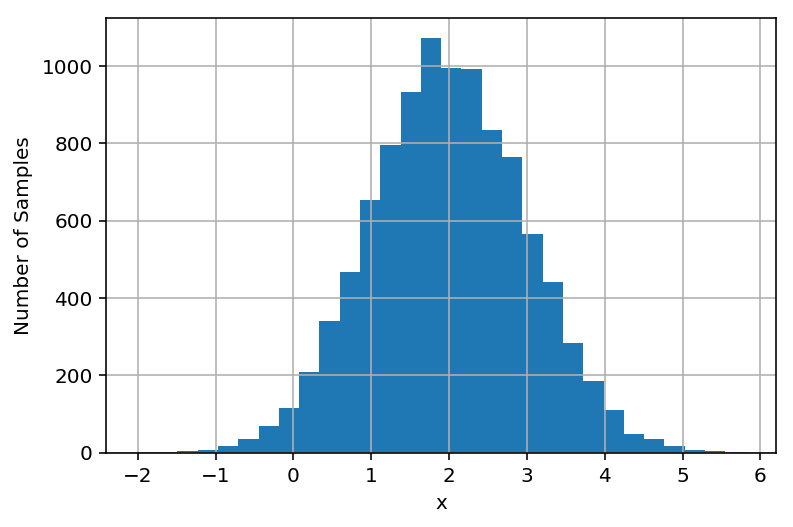


4.)
90th percentile = 3.267

5.)
90th percentile = 4.319

6.)
Examples from y: [ 4.04422192  3.85535993  0.99711177  1.55658765 -3.88588689]

7.)


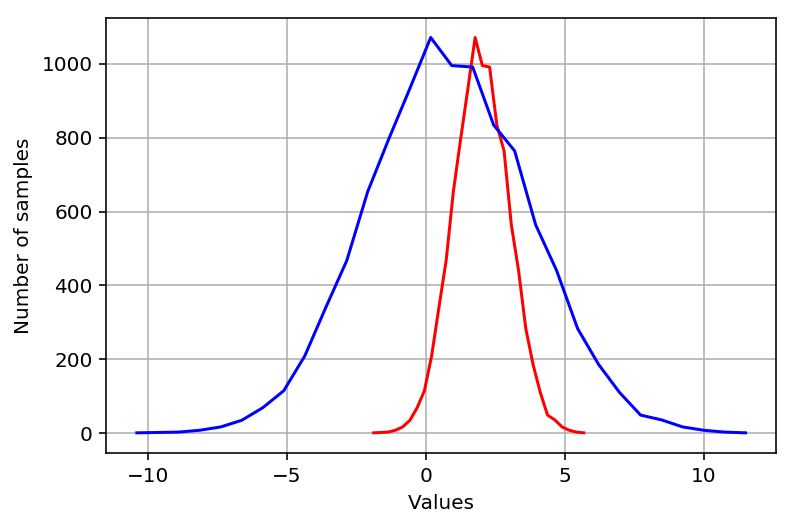


8.)
E[XY] = E[X]E[Y] = 0.01241


In [90]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12) # This ensures that random numbers will be reproducible

# 1. Synthesize data x
print('1.)')
x = np.random.randn(10000) + 2
print('Examples from x: {}'.format(x[0:5]))

# 2. Calculate the mean and standard deviation
print('\n2.)')
print('x_mean = {:.4}'.format(x.mean()))
print('x_std  = {:.4}'.format(x.std()))

# 3. Plot a historgram of x with 30 bins
print('\n3.)')
plt.hist(x,bins=30)
plt.xlabel('x')
plt.ylabel('Number of Samples')
plt.grid('on')
plt.show()

# 4. Compute the 90th percentile of x
print('\n4.)')
percentile90 = np.percentile(x,90)
print('90th percentile = {:.4}'.format(percentile90))

# 5. Compute the 99th percentile of x
print('\n5.)')
percentile99 = np.percentile(x,99)
print('90th percentile = {:.4}'.format(percentile99))

# 6. Synthesize the vector y
print('\n6.)')
y = 3*np.random.randn(10000)
print('Examples from y: {}'.format(y[0:5]))

# 7. Plot the histogram of the data in x and y on one plot and compare
print('\n7.)')
histx, binsx = np.histogram(x, bins=30)
histy, binsy = np.histogram(y, bins=30)
centerx = (binsx[:-1] + binsx[1:]) / 2
centery = (binsy[:-1] + binsy[1:]) / 2
plt.plot(centerx,histx,'r-',label='x')
plt.plot(centery,histx,'b-',label='y')
plt.xlabel('Values')
plt.ylabel('Number of samples')
plt.grid('on')
plt.show()

# 8. Estimate E[XY]
# Since X and Y are independent, this is very simple: E[XY] = E[X]E[Y]
print('\n8.)')
print('E[XY] = E[X]E[Y] = {:.4}'.format(x.mean() * y.mean()))

## 10
Estimate the integral of the function $f(x)$ on the interval $0\leq x < 2.5$ assuming we only know the following points from $f$:

*Table 1. Dataset containing n=5 observations*

| $x_i$ | 0.0 | 0.5 | 1.0 | 1.5 | 2.0 |
|-|-|-|-|-|-|
| $y_i$ | 6 | 7 | 8 | 4 | 1 |


**ANSWER**

In [99]:
import numpy as np

x = np.array([0,0.5,1.0,1.5,2.0])
y = np.array([6,7,8,4,1])

# Using a trapezoidal integration approach:
y_dif = (y[:-1] + y[1:]) / 2
dx = x[1:] - x[:-1]

int_y = sum(y_dif * dx )

print('The integral of y is: {:.4}'.format(int_y))

The integral of y is: 11.25
